<a href="https://colab.research.google.com/github/SaiVamshiKatkuri/MLnow_2.0/blob/main/Churn_Multivariate_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic**: `MultiVariate Classification`

[Link to download the Dataset](https://www.kaggle.com/shrutimechlearn/churn-modelling?select=Churn_Modelling.csv)


**AUTHOR**: Sai Vamshi Katkuri
[Assessment Repository](https://github.com/SaiVamshiKatkuri/MLnow_2.0)

**Reach out** :[Email](https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox) | [Linkedin](https://www.linkedin.com/in/katkuri-sai-vamshi-2209281a8/) | [Github](https://github.com/SaiVamshiKatkuri)

*Multivariate Modelling* using `ANN` and other `ML` techniques

**Description**: The dataset contains multiple features and in the end predicts a single column that tells whether a customer leaves from the bank or not. Churn modelling now a days plays a vital role in many fields. Because this is a chance to prevent customer from leaving our service. We can target the customers who are about to leave and provide them with considerable offers.



## Setup

In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
cd '/content/drive/MyDrive/Datasets'

In [ ]:
ls

In [ ]:
import os

#### Importing necessary libraries

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library
import os #using os commands between the python language
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset= pd.read_csv('Churn_Modelling.csv') #load the csv file as dataframe
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.info()

In [ ]:
print(f'There are {len(dataset.columns)} columns in the dataset ')    # Finding number of columns in dataset
print(dataset.columns)

In [ ]:
dataset.shape     # dimensions of dataset

In [ ]:
dataset.head(10)                       # Ten rows from top

In [ ]:
dataset.tail(10)             # Ten rows from bottom

*Let's drop first three columns as they have no significance*

In [ ]:
dataset=dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)


In [ ]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df.shape

In [ ]:
dataset.isnull().sum()       # Check for Null values

There are no null values in the dataset. Cheers! 🎊

In [ ]:
dataset.describe()

Let's define a function that plots a bar graph for `value_counts` of categorical data

In [ ]:
def plot_count(feature):
   plt.grid(True)
   font = {'family': 'serif',
        'color':  'cornflowerblue',
        'weight': 'normal',
        'size': 16,
        }
   dataset[feature].value_counts().plot(kind='barh',figsize=(8, 6))
   plt.xlabel("Count", labelpad=14,fontdict=font,color='darkred')
   plt.ylabel(feature+" variable", labelpad=14,fontdict=font,color='darkred')
   plt.title("Count of "+feature+" Variable per category", y=1.02,fontdict=font,color='darkred');

In [ ]:
dataset['Geography'].value_counts()

So, The data contains customer details from `3` different countries 🙂

In [ ]:
plot_count('Geography')

In [ ]:
dataset['Gender'].value_counts()

In [ ]:
plot_count('Gender')

Let's Find percentage of people who got Exited.

In [ ]:
100*dataset['Exited'].value_counts()/len(dataset['Exited'])

From the above info we can infer that approximately `20` percentage of total are about to leave.😥

Now, Lets plot a Bar Graph for that *Exited* column ✌





In [ ]:
plot_count('Exited')

Clearly most of the people wont exit. Even though we need to make sure that they stay long. .😎

#### For HasCrCard

In [ ]:
dataset['HasCrCard'].value_counts()

In [ ]:
plot_count('HasCrCard')

#### For Number of ActiveMembers

In [ ]:
dataset['IsActiveMember'].value_counts()

In [ ]:
plot_count('IsActiveMember')

#### For Number of Products

In [ ]:
dataset['NumOfProducts'].value_counts()

In [ ]:
plot_count('NumOfProducts')

In [ ]:
dataset.dtypes

We can see that there exists two categorical variables i.e: *Geography and Gender*. We cant find correlation using heatmaps if there are `categorical` variables because heatmaps dont work on categorical variables.

*We shall encode variables* 🛠

#### Function To Print the users in a category for specific Geographic Location

In [ ]:
def Calculate(Geography,Feature):
  Geography_list=dataset['Geography']
  Variable_List=dataset[Feature]              # Contains a column from dataset
  li=[]
  for i in range(len(Geography_list)):
    if Geography_list[i]== Geography:
       li.append(Variable_List[i])

  return sum(li)


#### Let us Analyse France over `4` cols `HasCrCard`,`IsActiveMember`,`NumOfProducts` and `Exited`

In [ ]:
Result=Calculate('France','HasCrCard')
print(f'There are {Result} people in france having Credit cards')
Result=Calculate('France','Exited')
print(f'There are {Result} people in France who exited the bank')
Result=Calculate('France','IsActiveMember')
print(f'There are {Result} people active from France')
Result=Calculate('France','NumOfProducts')
print(f'The number of products purchased from France is  {Result}')

#### Let us Analyse Spain over `4` cols `HasCrCard`,`IsActiveMember`,`NumOfProducts` and `Exited`

In [ ]:
Result=Calculate('Spain','HasCrCard')
print(f'There are {Result} people in Spain having Credit cards')
Result=Calculate('Spain','Exited')
print(f'There are {Result} people in Spain who exited the bank')
Result=Calculate('Spain','IsActiveMember')
print(f'There are {Result} people active from Spain')
Result=Calculate('Spain','NumOfProducts')
print(f'The number of products purchased from Spain is  {Result}')

#### Let us Analyse Germany over `4` cols `HasCrCard`,`IsActiveMember`,`NumOfProducts` and `Exited`

In [ ]:
Result=Calculate('Germany','HasCrCard')
print(f'There are {Result} people in Germany having Credit cards')
Result=Calculate('Germany','Exited')
print(f'There are {Result} people in Germany who exited the bank')
Result=Calculate('Germany','IsActiveMember')
print(f'There are {Result} people active from Germany')
Result=Calculate('Germany','NumOfProducts')
print(f'The number of products purchased from Germany is  {Result}')

#### Pair Plot

*Let us now find the relationship between variables*

In [ ]:
sns.pairplot(dataset,
             x_vars = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
             y_vars =  ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
        palette='husl'
             )


#### Strip Plot

In [ ]:
fig_dims = (14, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(y='Balance', x='Age', data=dataset, hue=None)

In [ ]:
sns.stripplot(x="Exited", y="EstimatedSalary", data=dataset)

In [ ]:
sns.stripplot(x="Geography", y="EstimatedSalary", data=dataset)

*There is no bias in salary estimate as max salary is almost same for all locations mentioned* 🤔

*Encoding Categorical Variables*

In [ ]:
dataset.head()

*Finding Correlation*

In [ ]:
# dataset.corr()
# Create a copy of the dataset to avoid modifying the original
encoded_dataset = dataset.copy()

# Encode 'Gender' using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_dataset['Gender'] = le.fit_transform(encoded_dataset['Gender'])

# One-hot encode 'Geography'
encoded_dataset = pd.get_dummies(encoded_dataset, columns=['Geography'], drop_first=True)

# Now compute the correlation
print(encoded_dataset.corr())


### HeatMap

*Correlation ranges from -1 to +1 wheres as covariance varies from -${\infty}$ to +${\infty}$*


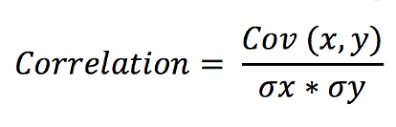

In [ ]:
plt.subplots(figsize=fig_dims)
sns.heatmap(dataset.corr(),annot=True,cmap="PuBuGn")

### Splitting the Model

In [ ]:
X = df.iloc[:, 0:-1].values       # We shall use df variable instead of dataset variable
y = df.iloc[:, -1].values

In [ ]:
print(X)

#### Label Encoding

**Encoded gender column into 1's annd 0's**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#### OneHotEncoding

**OneHotEncoding the Geography column**

<img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png" />

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

**Using Sklearn Library to split the model into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

This is a formula similar to `z-score`

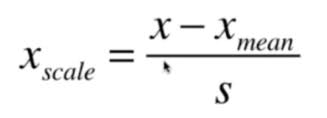

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainFeatures = sc.fit_transform(trainFeatures)
testFeatures = sc.transform(testFeatures)

In [ ]:
print(trainFeatures)

#Building Ann

**Cheers!** 😁

 *As the EDA and Data Processing is done. Let's build the model using ANN*

*Creating a Sequential Model*

In [ ]:
ann = tf.keras.models.Sequential()

*Let's add first hidden Layer* 🐱‍🏍

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

*Let's add second hidden Layer* 🐱‍🏍🐱‍🏍

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

*Let's add first output Layer* 💖

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

*Compilation Of Model*  🛠

**Binary cross entropy is used for binary classification**

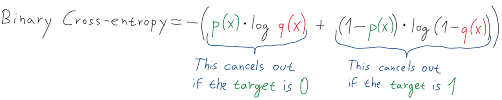

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

*Time to Prove the power of our model* 💪💪

In [ ]:
ann.fit(trainFeatures, trainLabels, batch_size = 32, epochs = 100)

*Hehe* 😎

**Our Model now has an accuracy of `85%` with loss `0.34`**

In [ ]:
testPred = ann.predict(testFeatures)
print(testPred)
testPred_Transformed= (testPred > 0.5)


#####Confusion Matrix
**It's a matrix with dimesnions `(2,2)` where columns and rows are positives and negatives**

<img src="https://www.nbshare.io/static/snapshots/cm_colored_1-min.png" >

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(testLabels, testPred_Transformed)
print(cm)
accuracy_score(testLabels,testPred_Transformed)

**Hurrah!** 🥳

On the test set our model has an accuracy of `86%`

Awww!! Let's now explore other models too 😁

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression     # Importing the necessary module
classifier = LogisticRegression(random_state = 0)       # Assigning variable to the model name
classifier.fit(trainFeatures, trainLabels)              # Fit the model

In [ ]:
pred_LR = classifier.predict(testFeatures)              # Prediction on testSet


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score          # Checking the accuracy and confusion matrix
cm = confusion_matrix(testLabels, pred_LR)
print(cm)
accuracy_score(testLabels, pred_LR)

### Support Vector Machines


In [ ]:
from sklearn.svm import SVC                                   # Importing the necessary module
classifier_SVM = SVC(kernel = 'linear', random_state = 0)     # Assigning variable to the model name
classifier_SVM.fit(trainFeatures, trainLabels)                # Fit the model

In [ ]:
pred_SVM = classifier_SVM.predict(testFeatures)               # Prediction on testSet

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score   # Checking the accuracy and confusion matrix
cm_SVM = confusion_matrix(testLabels, pred_SVM)
print(cm_SVM)
accuracy_score(testLabels, pred_SVM)

### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier                                                    # Importing the necessary module
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)     # Assigning variable to the model name
classifier_RF.fit(trainFeatures, trainLabels)                                                          # Fit the model

In [ ]:
pred_RF = classifier_RF.predict(testFeatures)        # Prediction on testSet

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score              # Checking the accuracy and confusion matrix
cm_RF = confusion_matrix(testLabels,pred_RF)
print(cm_RF)
accuracy_score(testLabels, pred_RF)

## XGB

In [ ]:
from xgboost import XGBClassifier                                 # Importing the necessary module
classifier_XGB = XGBClassifier()                                  # Assigning variable to the model name
classifier_XGB.fit(trainFeatures,trainLabels)                     # Fit the model

In [ ]:
pred_XGB = classifier_XGB.predict(testFeatures)                          # Prediction on testSet


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score              # Checking the accuracy and confusion matrix
cm_XGB = confusion_matrix(testLabels,pred_XGB)
print(cm_XGB)
accuracy_score(testLabels, pred_XGB)

## KNN

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=[]

for i  in range(20,30):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(trainFeatures,trainLabels)
    preds=knn.predict(testFeatures)
    error = sqrt(mean_squared_error(testLabels,preds))
    rmse.append(error)


curve = pd.DataFrame(rmse)
curve.plot()

In [ ]:
# From the graph we can see that the best K value is 25
from sklearn.neighbors import KNeighborsClassifier                                     # Importing the necessary module
classifier_KNN = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski', p = 2)    # Assigning variable to the model name
classifier_KNN.fit(trainFeatures,trainLabels)                                          # Fit the model

In [ ]:
pred_KNN = classifier_KNN.predict(testFeatures)                                        # Prediction on testSet

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score                             # Checking the accuracy and confusion matrix
cm_KNN = confusion_matrix(testLabels,pred_KNN)
print(cm_KNN)
accuracy_score(testLabels, pred_KNN)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier                                     # Importing the necessary module
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)     # Assigning variable to the model name
classifier_DT.fit(trainFeatures,trainLabels)                                        # Fit the model

In [ ]:
pred_DT = classifier_DT.predict(testFeatures)                                       # Prediction on testSet

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score                         # Checking the accuracy and confusion matrix
cm_DT = confusion_matrix(testLabels,pred_DT)
print(cm_DT)
accuracy_score(testLabels, pred_DT)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as gbc
classifier_gb=gbc(n_estimators=200,max_depth=3,learning_rate=0.1)
classifier_gb.fit(trainFeatures,trainLabels)

In [ ]:
pred_GB=classifier_gb.predict(testFeatures)
cm_GB=confusion_matrix(testLabels,pred_GB)
print(cm_GB)
accuracy_score(testLabels, pred_GB)

## Observations:
As we've done the classification using different algorithms on Multivariate Dataset. The accuracies are as below:

**1.XGboost   : 86%  (First Place)🥇**

**2.Gradient Boosting: 86% (Second Place)🥈**

**3. Artificial Neural Networks : 85%  (Third Place)🥉**

**4. Random Forest : 85% Approx**

**5. KNN : 83%**

**6. Decision Trees : 80%**

**7. Logistic Regression : 80%**

**8. Support Vector Machines : 80% Approx**





*Though all the models are having good accuracy, true negatives are correctly being predicted bt ANN, XGB, Decision Trees*

### Weighted Average of three models

* Lets Assign weight to the predictions of `XGBOOST`,`GradientBoosting`,`Decision Trees`

In [ ]:
Weighted_Preds=((0.34*pred_XGB)+(0.33*pred_GB)+(0.33*pred_DT))
Weighted_Preds=(Weighted_Preds>=0.5)
print(Weighted_Preds)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_Weighted = confusion_matrix(testLabels,Weighted_Preds)
print(cm_Weighted)
accuracy_score(testLabels, Weighted_Preds)

## End of Code 😎